In [1]:
file = r"../销量相关/中国汽车销量.csv"
df = spark.read.csv(file, header=True, inferSchema=True)
df = df.withColumnRenamed('时间', 'time').withColumnRenamed('销量', 'carNumber').withColumnRenamed('同比增长', 'increaseRate')
df.show()
df.printSchema()
df.count()

+-------+---------+------------+
|   time|carNumber|increaseRate|
+-------+---------+------------+
|2021-01|  2358372|      39.01%|
|2020-12|  2285751|       3.28%|
|2020-11|  2098448|       2.03%|
|2020-10|  2300447|      19.34%|
|2020-09|  2075889|       7.52%|
|2020-08|  1754600|       6.15%|
|2020-07|  1664826|       8.96%|
|2020-06|  1720593|      -0.42%|
|2020-05|  1673900|       7.22%|
|2020-04|  1536600|      -2.43%|
|2020-03|  1039532|     -48.52%|
|2020-02|   216481|     -82.25%|
|2020-01|  1696520|     -16.06%|
|2019-12|  2213089|       -0.9%|
|2019-11|  2056669|      -5.37%|
|2019-10|  1927669|      -5.82%|
|2019-09|  1930637|       -6.3%|
|2019-08|  1652908|      -7.65%|
|2019-07|  1527912|      -3.88%|
|2019-06|  1727910|       -7.8%|
+-------+---------+------------+
only showing top 20 rows

root
 |-- time: string (nullable = true)
 |-- carNumber: integer (nullable = true)
 |-- increaseRate: string (nullable = true)



169

In [2]:
df = df.filter(df['increaseRate'] != '-')
df.count()
df.show()

+-------+---------+------------+
|   time|carNumber|increaseRate|
+-------+---------+------------+
|2021-01|  2358372|      39.01%|
|2020-12|  2285751|       3.28%|
|2020-11|  2098448|       2.03%|
|2020-10|  2300447|      19.34%|
|2020-09|  2075889|       7.52%|
|2020-08|  1754600|       6.15%|
|2020-07|  1664826|       8.96%|
|2020-06|  1720593|      -0.42%|
|2020-05|  1673900|       7.22%|
|2020-04|  1536600|      -2.43%|
|2020-03|  1039532|     -48.52%|
|2020-02|   216481|     -82.25%|
|2020-01|  1696520|     -16.06%|
|2019-12|  2213089|       -0.9%|
|2019-11|  2056669|      -5.37%|
|2019-10|  1927669|      -5.82%|
|2019-09|  1930637|       -6.3%|
|2019-08|  1652908|      -7.65%|
|2019-07|  1527912|      -3.88%|
|2019-06|  1727910|       -7.8%|
+-------+---------+------------+
only showing top 20 rows



In [3]:
df.createOrReplaceTempView('TableB')
df = spark.sql("SELECT * from TableB")
df.show()

timeList = [row.time for row in df.collect()]
carNumberList = [row.carNumber for row in df.collect()]
increaseRateList = [row.increaseRate for row in df.collect()]

print(len(timeList), len(carNumberList), len(increaseRateList))
print(increaseRateList)

+-------+---------+------------+
|   time|carNumber|increaseRate|
+-------+---------+------------+
|2021-01|  2358372|      39.01%|
|2020-12|  2285751|       3.28%|
|2020-11|  2098448|       2.03%|
|2020-10|  2300447|      19.34%|
|2020-09|  2075889|       7.52%|
|2020-08|  1754600|       6.15%|
|2020-07|  1664826|       8.96%|
|2020-06|  1720593|      -0.42%|
|2020-05|  1673900|       7.22%|
|2020-04|  1536600|      -2.43%|
|2020-03|  1039532|     -48.52%|
|2020-02|   216481|     -82.25%|
|2020-01|  1696520|     -16.06%|
|2019-12|  2213089|       -0.9%|
|2019-11|  2056669|      -5.37%|
|2019-10|  1927669|      -5.82%|
|2019-09|  1930637|       -6.3%|
|2019-08|  1652908|      -7.65%|
|2019-07|  1527912|      -3.88%|
|2019-06|  1727910|       -7.8%|
+-------+---------+------------+
only showing top 20 rows

157 157 157
['39.01%', '3.28%', '2.03%', '19.34%', '7.52%', '6.15%', '8.96%', '-0.42%', '7.22%', '-2.43%', '-48.52%', '-82.25%', '-16.06%', '-0.9%', '-5.37%', '-5.82%', '-6.3%', '-7.

In [4]:
rateList = []
for each in increaseRateList:
    smallRateList = each.split('%', 1)
    rateList.append(smallRateList[0])
print(rateList)

numberList = []
for each in carNumberList:
    smallNumber = int(each/100000)
    numberList.append(smallNumber)
print(numberList)

['39.01', '3.28', '2.03', '19.34', '7.52', '6.15', '8.96', '-0.42', '7.22', '-2.43', '-48.52', '-82.25', '-16.06', '-0.9', '-5.37', '-5.82', '-6.3', '-7.65', '-3.88', '-7.8', '-17.37', '-17.73', '-6.88', '-17.35', '-17.71', '-15.84', '-16.06', '-12.99', '-12.04', '-4.55', '-5.3', '2.31', '7.89', '11.16', '3.45', '-9.63', '10.73', '-0.71', '-0.03', '0.36', '3.27', '4.44', '4.61', '2.68', '-2.33', '-3.2', '1.97', '18.6', '-0.47', '9.42', '17.91', '21.03', '29.53', '26.58', '26.48', '18.04', '11.42', '6.61', '9.91', '-1.44', '9.36', '18.49', '23.74', '13.34', '3.26', '-3.39', '-6.58', '-3.37', '1.19', '3.72', '9.37', '6.44', '10.35', '15.99', '4.66', '6.42', '6.43', '8.49', '9.72', '11.45', '13.85', '11.63', '7.86', '18.01', '7.03', '21.47', '16.08', '-0.01', '-1.47', '11.02', '10.48', '9.29', '-13.09', '-12.51', '-15.69', '-8.34', '24.16', '-13.42', '-11.76', '5.32', '-1.75', '-11.75', '-12.16', '-10.57', '16.23', '6.16', '2.85', '-4.25', '-26.63', '1.37', '-15.81', '-0.9', '5.74', '4.47

In [5]:
from pyecharts.charts import Bar, Grid, Line, Pie, Tab
from pyecharts import options as opts

In [6]:
def carIncrease():
    bar = Bar()\
    .add_xaxis(xaxis_data=timeList)\
    .add_yaxis('汽车销量', numberList,label_opts=opts.LabelOpts(is_show=False))\
    .extend_axis(yaxis=opts.AxisOpts(name="同比增长",type_="value",min_=-200,max_=100,interval=20,))\
    .set_global_opts(\
        datazoom_opts=opts.DataZoomOpts(range_start=0.5, range_end=15.5),\
        tooltip_opts=opts.TooltipOpts(\
            is_show=True, trigger="axis", axis_pointer_type="cross"\
        ),\
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(rotate=50, interval=0)),\
        yaxis_opts=opts.AxisOpts(\
            name="销量(单位：十万)",\
            type_="value", min_=0, max_=40,\
            interval=5,\
            axistick_opts=opts.AxisTickOpts(is_show=True),\
            splitline_opts=opts.SplitLineOpts(is_show=True),\
        ),)
    line = Line()\
    .add_xaxis(xaxis_data=timeList)\
    .add_yaxis("同比增长", rateList,  is_smooth=True, yaxis_index=1,)
    bar.overlap(line)
    return Grid().add(bar, opts.GridOpts(pos_left="5%", pos_right="20%"), is_control_axis_index=True)

In [7]:
file=r"../销量相关/车型销量/车型销量(2020.01-2020.12).csv"
file1=r"../销量相关/车型销量/车型销量(2019.01-2019.12).csv"
file2=r"../销量相关/车型销量/车型销量(2018.01-2018.12).csv"
file3=r"../销量相关/车型销量/车型销量(2017.01-2017.12).csv"
file4=r"../销量相关/车型销量/车型销量(2016.01-2016.12).csv"
file5=r"../销量相关/车型销量/车型销量(2015.01-2015.12).csv"
file6=r"../销量相关/车型销量/车型销量(2014.01-2014.12).csv"
file7=r"../销量相关/车型销量/车型销量(2013.01-2013.12).csv"

# 再读取csv文件
df = spark.read.csv(file, header=True, inferSchema=True)
df1 = spark.read.csv(file1, header=True, inferSchema=True)
df2 = spark.read.csv(file2, header=True, inferSchema=True)
df3 = spark.read.csv(file3, header=True, inferSchema=True)
df4 = spark.read.csv(file4, header=True, inferSchema=True)
df5 = spark.read.csv(file5, header=True, inferSchema=True)
df6 = spark.read.csv(file6, header=True, inferSchema=True)
df7 = spark.read.csv(file7, header=True, inferSchema=True)

df = df.withColumnRenamed('车型','Type').withColumnRenamed('销量','TotalNumber')
df1 = df1.withColumnRenamed('车型','Type').withColumnRenamed('销量','TotalNumber')
df2 = df2.withColumnRenamed('车型','Type').withColumnRenamed('销量','TotalNumber')
df3 = df3.withColumnRenamed('车型','Type').withColumnRenamed('销量','TotalNumber')
df4 = df4.withColumnRenamed('车型','Type').withColumnRenamed('销量','TotalNumber')
df5 = df5.withColumnRenamed('车型','Type').withColumnRenamed('销量','TotalNumber')
df6 = df6.withColumnRenamed('车型','Type').withColumnRenamed('销量','TotalNumber')
df7 = df7.withColumnRenamed('车型','Type').withColumnRenamed('销量','TotalNumber')

df7.show()

+----+--------+-----------+--------------+-------------+
|排名|    Type|TotalNumber|          厂商|   售价(万元)|
+----+--------+-----------+--------------+-------------+
|   1|    乐驰|     542381|  上汽通用五菱|  0.00 - 0.00|
|   2|五菱宏光|     530050|  上汽通用五菱|  4.28 - 6.98|
|   3|五菱之光|     455718|  上汽通用五菱|  3.23 - 3.66|
|   4|  福克斯|     403640|      长安福特|10.88 - 15.38|
|   5|    朗逸|     374056|      上汽大众| 9.99 - 16.19|
|   6|    凯越|     296183|  上汽通用别克|  8.39 - 9.99|
|   7|    赛欧|     276242|上汽通用雪佛兰|  6.29 - 7.99|
|   8|    速腾|     271188|     一汽-大众|12.89 - 19.29|
|   9|    捷达|     263408|     一汽-大众| 7.98 - 10.68|
|  10|    轩逸|     259545|      东风日产| 9.98 - 14.30|
|  11|  科鲁兹|     246890|上汽通用雪佛兰|  0.00 - 0.00|
|  12|    宝来|     237156|     一汽-大众| 9.88 - 15.70|
|  13|  帕萨特|     227240|      上汽大众|18.59 - 28.29|
|  14|  哈弗H6|     217842|      长城汽车| 9.80 - 15.49|
|  15|    朗动|     206348|      北京现代|11.58 - 12.78|
|  16|    英朗|     204274|  上汽通用别克|11.99 - 12.59|
|  17|圣达菲00|     204037|      华泰汽车|  0.00 - 

In [8]:
df.printSchema()

root
 |-- 排名: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- TotalNumber: integer (nullable = true)
 |-- 厂商: string (nullable = true)
 |-- 售价(万元): string (nullable = true)



In [9]:
df.createOrReplaceTempView("tableA")
df1.createOrReplaceTempView("tableB")
df2.createOrReplaceTempView("tableC")
df3.createOrReplaceTempView("tableD")
df4.createOrReplaceTempView("tableE")
df5.createOrReplaceTempView("tableF")
df6.createOrReplaceTempView("tableG")
df7.createOrReplaceTempView("tableH")

saleNumberRankDf = spark.sql("SELECT Type, TotalNumber from tableA Limit 10")
saleNumberRankDf1 = spark.sql("SELECT Type, TotalNumber from tableB Limit 10")
saleNumberRankDf2 = spark.sql("SELECT Type, TotalNumber from tableC Limit 10")
saleNumberRankDf3 = spark.sql("SELECT Type, TotalNumber from tableD Limit 10")
saleNumberRankDf4 = spark.sql("SELECT Type, TotalNumber from tableE Limit 10")
saleNumberRankDf5 = spark.sql("SELECT Type, TotalNumber from tableF Limit 10")
saleNumberRankDf6 = spark.sql("SELECT Type, TotalNumber from tableG Limit 10")
saleNumberRankDf7 = spark.sql("SELECT Type, TotalNumber from tableH Limit 10")

newTypeList0 = [row.Type for row in saleNumberRankDf.collect()]
newTypeList1 = [row.Type for row in saleNumberRankDf1.collect()]
newTypeList2 = [row.Type for row in saleNumberRankDf2.collect()]
newTypeList3 = [row.Type for row in saleNumberRankDf3.collect()]
newTypeList4 = [row.Type for row in saleNumberRankDf4.collect()]
newTypeList5 = [row.Type for row in saleNumberRankDf5.collect()]
newTypeList6 = [row.Type for row in saleNumberRankDf6.collect()]
newTypeList7 = [row.Type for row in saleNumberRankDf7.collect()]

newTotalNumber0 = [int(row.TotalNumber) for row in saleNumberRankDf.collect()]
newTotalNumber1 = [int(row.TotalNumber) for row in saleNumberRankDf1.collect()]
newTotalNumber2 = [int(row.TotalNumber) for row in saleNumberRankDf2.collect()]
newTotalNumber3 = [int(row.TotalNumber) for row in saleNumberRankDf3.collect()]
newTotalNumber4 = [int(row.TotalNumber) for row in saleNumberRankDf4.collect()]
newTotalNumber5 = [int(row.TotalNumber) for row in saleNumberRankDf5.collect()]
newTotalNumber6 = [int(row.TotalNumber) for row in saleNumberRankDf6.collect()]
newTotalNumber7 = [int(row.TotalNumber) for row in saleNumberRankDf7.collect()]

finalTypeList = []
finalTotalNumber = []
finalTypeList.append(newTypeList7)
finalTypeList.append(newTypeList6)
finalTypeList.append(newTypeList5)
finalTypeList.append(newTypeList4)
finalTypeList.append(newTypeList3)
finalTypeList.append(newTypeList2)
finalTypeList.append(newTypeList1)
finalTypeList.append(newTypeList0)
print(finalTypeList)

finalTotalNumber.append(newTotalNumber7)
finalTotalNumber.append(newTotalNumber6)
finalTotalNumber.append(newTotalNumber5)
finalTotalNumber.append(newTotalNumber4)
finalTotalNumber.append(newTotalNumber3)
finalTotalNumber.append(newTotalNumber2)
finalTotalNumber.append(newTotalNumber1)
finalTotalNumber.append(newTotalNumber0)
print(finalTotalNumber)

[['乐驰', '五菱宏光', '五菱之光', '福克斯', '朗逸', '凯越', '赛欧', '速腾', '捷达', '轩逸'], ['五菱宏光', '福克斯', '朗逸', '五菱荣光', '哈弗H6', '五菱之光', '速腾', '轩逸', '捷达', '凯越'], ['五菱宏光', '朗逸', '哈弗H6', '轩逸', '宝骏730', '英朗', '速腾', '捷达', '朗动', '桑塔纳'], ['五菱宏光', '哈弗H6', '科鲁兹', '朗逸', '英朗', '宝骏730', '轩逸', '捷达', '速腾', '传祺GS4'], ['五菱宏光', '哈弗H6', '朗逸', '英朗', '轩逸', '宝骏510', '传祺GS4', '卡罗拉', '速腾', '捷达'], ['五菱宏光', '轩逸', '朗逸', '哈弗H6', '卡罗拉', '宝骏510', '捷达', '速腾', '桑塔纳', '英朗'], ['朗逸', '轩逸', '哈弗H6', '五菱宏光', '卡罗拉', '宝来', '速腾', '英朗', '桑塔纳', '思域'], ['轩逸', '朗逸', '哈弗H6', '卡罗拉', '宝来', '速腾', '英朗', '五菱宏光', '本田CR-V', '博越']]
[[542381, 530050, 455718, 403640, 374056, 296183, 276242, 271188, 263408, 259545], [750019, 393864, 371962, 345101, 315878, 308668, 300082, 300058, 296960, 293098], [655531, 381094, 373229, 334087, 321069, 290213, 279892, 274932, 267085, 255966], [650045, 580683, 544415, 478940, 370376, 370169, 367979, 348437, 341333, 333280], [534380, 506362, 457114, 416990, 405854, 363949, 337330, 333488, 332733, 325979], [476538, 475696, 468792,

In [10]:
from pyecharts.charts import Bar
from pyecharts.charts import Pie, Timeline
from pyecharts.charts import Page
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode

In [11]:
pie = Pie()\
    .add('', [list(z) for z in zip(newTypeList0, newTotalNumber0)], center=["20%", "16%"], radius=[20, 30],)\
    .add('', [list(z) for z in zip(newTypeList1, newTotalNumber1)],  center=["65%", "16%"], radius=[20, 30],)\
    .add('', [list(z) for z in zip(newTypeList2, newTotalNumber2)], center=["20%", "40%"], radius=[20, 30],)\
    .add('', [list(z) for z in zip(newTypeList3, newTotalNumber3)], center=["65%", "40%"], radius=[20, 30],)\
    .add('', [list(z) for z in zip(newTypeList4, newTotalNumber4)], center=["20%", "64%"], radius=[20, 30],)\
    .add('', [list(z) for z in zip(newTypeList5, newTotalNumber5)], center=["65%", "64%"], radius=[20, 30],)\
    .add('', [list(z) for z in zip(newTypeList6, newTotalNumber6)], center=["20%", "88%"], radius=[20, 30],)\
    .add('', [list(z) for z in zip(newTypeList7, newTotalNumber7)], center=["65%", "88%"], radius=[20, 30],)\
    .set_global_opts(title_opts=opts.TitleOpts(title="2013-2020中国汽车车型销量排行榜"),legend_opts=opts.LegendOpts(\
            type_="scroll", pos_top="5%", pos_left="90%", orient="vertical"))\
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
pie.render_notebook()
# pie.render('/Users/haoyingkai/Desktop/毕业设计数据/大数据网页/2013-2020中国汽车车型销量排行榜.html')

In [12]:
def carModelRank():
    tl = Timeline()
    for i in range(2013, 2021):
            pie = (
                Pie()
                .add(
                    "中国汽车销量排行",
                    [list(z) for z in zip(finalTypeList[i-2013], finalTotalNumber[i-2013])],
                    rosetype="radius",
                    radius=["30%", "55%"],
                )
                .set_global_opts(title_opts=opts.TitleOpts("中国{}年汽车车型销量排行榜".format(i)),legend_opts=opts.LegendOpts(\
                    type_="scroll", pos_top="20%", pos_left="90%", orient="vertical"))
            )
            tl.add(pie, "{}年".format(i))
    
    return tl

In [13]:
wholeModelList = []
wholeSaleNumberList0 = []
for i in range(2, 11):
    if i < 10:
        path1 = "../销量相关/家用轿车销量/家用轿车销量(201"
        path2 = ".01-201"
        path3 = ".12).csv"
        path = (f'{path1}{i}{path2}{i}{path3}')
    else:
        path = "/Users/haoyingkai/Desktop/毕业设计数据/销量相关/家用轿车销量/家用轿车销量(2020.01-2020.12).csv"
    
    df = spark.read.csv(path, header=True, inferSchema=True)
    df = df.withColumnRenamed('车型','Type').withColumnRenamed('销量','TotalNumber')
    
    df.createOrReplaceTempView("tableA")
    saleNumberRankDf = spark.sql("SELECT Type, TotalNumber from tableA Limit 10")
    
    newTypeList = [row.Type for row in saleNumberRankDf.collect()]
    newTotalNumber = [int(row.TotalNumber) for row in saleNumberRankDf.collect()]
    
    wholeModelList.append(newTypeList)
    wholeSaleNumberList0.append(newTotalNumber)
print(wholeModelList)
print(wholeSaleNumberList0)

[['瑞麒M1', '福克斯', '赛欧', '凯越', '朗逸', '捷达', '科鲁兹', '宝来', '悦动', '帕萨特'], ['乐驰', '福克斯', '朗逸', '凯越', '赛欧', '速腾', '捷达', '轩逸', '科鲁兹', '宝来'], ['福克斯', '朗逸', '速腾', '轩逸', '捷达', '凯越', '桑塔纳', '科鲁兹', '赛欧', '朗动'], ['朗逸', '轩逸', '英朗', '速腾', '捷达', '朗动', '桑塔纳', '卡罗拉', '科鲁兹', '福克斯'], ['科鲁兹', '朗逸', '英朗', '轩逸', '捷达', '速腾', '卡罗拉', '福睿斯', '桑塔纳', '朗动'], ['朗逸', '英朗', '轩逸', '卡罗拉', '速腾', '捷达', '福睿斯', '桑塔纳', '宝来', '帝豪'], ['轩逸', '朗逸', '卡罗拉', '捷达', '速腾', '桑塔纳', '英朗', '科沃兹', '宝来', '迈腾'], ['朗逸', '轩逸', '卡罗拉', '宝来', '速腾', '英朗', '桑塔纳', '思域', '雅阁', '雷凌'], ['轩逸', '朗逸', '卡罗拉', '宝来', '速腾', '英朗', '思域', '帝豪', '雷凌', '雅阁']]
[[325769, 296360, 279728, 252937, 246687, 242528, 233485, 222970, 217026, 210567], [542381, 403640, 374056, 296183, 276242, 271188, 263408, 259545, 246890, 237156], [393864, 371962, 300082, 300058, 296960, 293098, 285293, 266098, 253304, 252338], [381094, 334087, 290213, 279892, 274932, 267085, 255966, 254301, 250172, 240788], [544415, 478940, 370376, 367979, 348437, 341333, 306541, 296867, 282815, 254027], [45

In [14]:
def carFamilyModelRank():
    tl = Timeline()
    for i in range(2012, 2021):
            pie = (
                Pie()
                .add(
                    "中国汽车销量排行",
                    [list(z) for z in zip(wholeModelList[i-2012], wholeSaleNumberList0[i-2012])],
                    rosetype="radius",
                    radius=["30%", "55%"],
                )
                .set_global_opts(title_opts=opts.TitleOpts("中国{}年家用轿车销量排行榜".format(i)),legend_opts=opts.LegendOpts(\
                    type_="scroll", pos_top="20%", pos_left="90%", orient="vertical"))
            )
            tl.add(pie, "{}年".format(i))
    
    return tl

In [15]:
wholeManufactureList = []
wholeSaleNumberList1 = []
for i in range(2, 11):
    if i < 10:
        path1 = "../销量相关/汽车厂商销量/汽车厂商销量(201"
        path2 = ".01-201"
        path3 = ".12).csv"
        path = (f'{path1}{i}{path2}{i}{path3}')
    else:
        path = "../销量相关/汽车厂商销量/汽车厂商销量(2020.01-2020.12).csv"
    
    df = spark.read.csv(path, header=True, inferSchema=True)
    df = df.withColumnRenamed('厂商','Manufacture').withColumnRenamed('销量','TotalNumber')
    
    df.createOrReplaceTempView("tableA")
    saleNumberRankDf = spark.sql("SELECT Manufacture, TotalNumber from tableA Limit 10")
    
    newTypeList = [row.Manufacture for row in saleNumberRankDf.collect()]
    newTotalNumber = [int(row.TotalNumber) for row in saleNumberRankDf.collect()]
    
    wholeManufactureList.append(newTypeList)
    wholeSaleNumberList1.append(newTotalNumber)
print(wholeManufactureList)
print(wholeSaleNumberList1)

[['上汽大众', '一汽-大众', '北京现代', '上汽通用五菱', '东风日产', '上汽通用别克', '上汽通用雪佛兰', '一汽丰田', '吉利汽车', '东风悦达起亚'], ['上汽大众', '一汽-大众', '北京现代', '上汽通用五菱', '东风日产', '上汽通用别克', '上汽通用雪佛兰', '长安福特', '一汽丰田', '吉利汽车'], ['上汽大众', '上汽通用五菱', '一汽-大众', '北京现代', '上汽通用别克', '东风日产', '长安福特', '上汽通用雪佛兰', '东风悦达起亚', '一汽丰田'], ['上汽大众', '上汽通用五菱', '一汽-大众', '北京现代', '上汽通用别克', '东风日产', '长安福特', '长安汽车', '长城汽车', '上汽通用雪佛兰'], ['上汽大众', '一汽-大众', '上汽通用别克', '北京现代', '上汽通用五菱', '东风日产', '长安福特', '长城汽车', '吉利汽车', '上汽通用五菱'], ['上汽大众', '一汽-大众', '吉利汽车', '上汽通用别克', '东风日产', '上汽通用五菱', '上汽通用五菱', '长城汽车', '长安福特', '长安汽车'], ['上汽大众', '一汽-大众', '吉利汽车', '东风日产', '上汽通用别克', '上汽通用五菱', '北京现代', '上汽通用五菱', '长城汽车', '广汽本田'], ['上汽大众', '一汽-大众', '吉利汽车', '东风日产', '上汽通用别克', '东风本田', '长城汽车', '广汽本田', '一汽丰田', '北京现代'], ['上汽大众', '一汽-大众', '吉利汽车', '东风日产', '上汽通用别克', '东风本田', '广汽本田', '长安汽车', '一汽丰田', '广汽丰田']]
[[1050005, 1000188, 843488, 840078, 729333, 673307, 639467, 495477, 487643, 480443], [1293808, 1101887, 1030705, 1003132, 819958, 807701, 714673, 678951, 554661, 549393], [1442616, 1404797, 1267887,

In [16]:
def carManufactureRank():
    tl = Timeline()
    for i in range(2012, 2021):
            pie = (
                Pie()
                .add(
                    "中国汽车销量排行",
                    [list(z) for z in zip(wholeManufactureList[i-2012], wholeSaleNumberList1[i-2012])],
                    rosetype="radius",
                    radius=["30%", "55%"],
                )
                .set_global_opts(title_opts=opts.TitleOpts("中国{}年汽车厂商销量排行榜".format(i)),legend_opts=opts.LegendOpts(\
                    type_="scroll", pos_top="20%", pos_left="85%", orient="vertical"))
            )
            tl.add(pie, "{}年".format(i))
    
    return tl

In [17]:
wholeSUVList = []
wholeSaleNumberList2 = []
for i in range(2, 11):
    if i < 10:
        path1 = "../销量相关/SUV销量/SUV销量(201"
        path2 = ".01-201"
        path3 = ".12).csv"
        path = (f'{path1}{i}{path2}{i}{path3}')
    else:
        path = "../销量相关/SUV销量/SUV销量(2020.01-2020.12).csv"
    
    df = spark.read.csv(path, header=True, inferSchema=True)
    df = df.withColumnRenamed('车型','Type').withColumnRenamed('销量','TotalNumber')
    
    df.createOrReplaceTempView("tableA")
    saleNumberRankDf = spark.sql("SELECT Type, TotalNumber from tableA Limit 10")
    
    newTypeList = [row.Type for row in saleNumberRankDf.collect()]
    newTotalNumber = [int(row.TotalNumber) for row in saleNumberRankDf.collect()]
    
    wholeSUVList.append(newTypeList)
    wholeSaleNumberList2.append(newTotalNumber)
print(wholeSUVList)
print(wholeSaleNumberList2)

[['圣达菲00', '本田CR-V', '途观', '北京现代ix35', '逍客', 'RAV4荣放', '奥迪Q5', '比亚迪S6', '智跑', '汉兰达'], ['哈弗H6', '圣达菲00', '途观', '本田CR-V', '北京现代ix35', '逍客', 'RAV4荣放', '奥迪Q5', '翼虎', '汉兰达'], ['哈弗H6', '途观', '圣达菲00', '本田CR-V', '北京现代ix35', '翼虎', 'RAV4荣放', '奇骏', '奥迪Q5', '长安CS35'], ['哈弗H6', '途观', '圣达菲00', '北汽幻速S3', '长安CS75', '哈弗H2', '奇骏', '昂科威', '本田CR-V', '长安CS35'], ['哈弗H6', '传祺GS4', '宝骏560', '昂科威', '途观', '长安CS75', '哈弗H2', '瑞风S3', '本田CR-V', '奇骏'], ['哈弗H6', '宝骏510', '传祺GS4', '博越', '长安CS75', '荣威RX5', '昂科威', '哈弗H2', '奇骏', '途观L'], ['哈弗H6', '宝骏510', '博越', '传祺GS4', '途观L', '荣威RX5', '奇骏', '昂科威', '本田XR-V', '逍客'], ['哈弗H6', '博越', '本田CR-V', '奇骏', '长安CS75', '途观L', '逍客', '探岳', '宝骏510', '本田XR-V'], ['哈弗H6', '本田CR-V', '博越', '长安CS75 PLUS', '奇骏', 'RAV4荣放', '途观L', '探岳', '本田XR-V', '昂科威']]
[[278211, 180706, 173062, 108241, 105143, 98179, 90157, 86851, 75964, 75059], [217842, 204037, 199782, 189972, 156876, 124589, 117800, 102121, 95891, 95216], [315878, 237404, 220403, 168179, 145304, 135998, 124680, 114459, 106999, 100571], [373229

In [18]:
def carSUVRank():
    tl = Timeline()
    for i in range(2012, 2021):
            pie = (
                Pie()
                .add(
                    "中国汽车销量排行",
                    [list(z) for z in zip(wholeSUVList[i-2012], wholeSaleNumberList2[i-2012])],
                    rosetype="radius",
                    radius=["30%", "55%"],
                )
                .set_global_opts(title_opts=opts.TitleOpts("中国{}年SUV销量排行榜".format(i)),legend_opts=opts.LegendOpts(\
                    type_="scroll", pos_top="20%", pos_left="85%", orient="vertical"))
            )
            tl.add(pie, "{}年".format(i))
    
    return tl

In [19]:
wholeBrandList = []
wholeSaleNumberList3 = []
wholeCountryList = []
wholeCountOfBrandList = []
wholeCountryList1 = []
wholeCountOfBrandList1 = []
for i in range(2, 11):
    if i < 10:
        path1 = "../销量相关/汽车品牌销量/汽车品牌销量(201"
        path2 = ".01-201"
        path3 = ".12).csv"
        path = (f'{path1}{i}{path2}{i}{path3}')
    else:
        path = "../销量相关/汽车品牌销量/汽车品牌销量(2020.01-2020.12).csv"
    
    df = spark.read.csv(path, header=True, inferSchema=True)
    df = df.withColumnRenamed('品牌名称','BrandName').withColumnRenamed('销量','TotalNumber').withColumnRenamed('国别', 'Country')
    
    df.createOrReplaceTempView("tableA")
    saleNumberRankDf = spark.sql("SELECT BrandName, TotalNumber from tableA Limit 50")
    
    newBrandNameList = [row.BrandName for row in saleNumberRankDf.collect()]
    newTotalNumber = [int(row.TotalNumber) for row in saleNumberRankDf.collect()]
    
    wholeBrandList.append(newBrandNameList)
    wholeSaleNumberList3.append(newTotalNumber)
    
    df.createOrReplaceTempView("tableB")
    limitBrandDf = spark.sql("SELECT * from tableA Limit 10")
    
    limitBrandDf.createOrReplaceTempView("tableC")
    diffCountryDf = spark.sql("SELECT country,COUNT(DISTINCT BrandName) AS countOfBrand FROM TableC\
                        GROUP BY country ORDER BY countOfBrand DESC")
    newCountryList = [row.country for row in diffCountryDf.collect()]
    newNumberList = [row.countOfBrand for row in diffCountryDf.collect()]
    
    wholeCountryList.append(newCountryList)
    wholeCountOfBrandList.append(newNumberList) 
    
    df.createOrReplaceTempView("tableD")
    limitBrandDf1 = spark.sql("SELECT * from tableA Limit 20")
    
    limitBrandDf1.createOrReplaceTempView("tableE")
    diffCountryDf1 = spark.sql("SELECT country,COUNT(DISTINCT BrandName) AS countOfBrand FROM TableE\
                        GROUP BY country ORDER BY countOfBrand DESC")
    newCountryList1 = [row.country for row in diffCountryDf1.collect()]
    newNumberList1= [row.countOfBrand for row in diffCountryDf1.collect()]
    
    wholeCountryList1.append(newCountryList1)
    wholeCountOfBrandList1.append(newNumberList1)
print(wholeCountryList1)
print(wholeCountOfBrandList1)


[['中国', '日本', '美国', '德国', '韩国', '法国', '捷克'], ['中国', '日本', '美国', '德国', '韩国', '法国'], ['中国', '美国', '日本', '德国', '韩国', '法国', '捷克'], [], ['中国', '美国', '日本', '德国', '韩国'], ['中国', '德国', '日本', '美国', '韩国'], ['中国', '德国', '日本', '美国', '韩国'], ['中国', '德国', '日本', '美国', '韩国'], ['中国', '德国', '日本', '美国', '韩国']]
[[6, 5, 3, 2, 2, 1, 1], [7, 5, 3, 2, 2, 1], [7, 3, 3, 2, 2, 2, 1], [], [10, 3, 3, 2, 2], [9, 4, 3, 3, 1], [9, 4, 3, 3, 1], [9, 4, 3, 2, 2], [9, 4, 3, 3, 1]]


In [20]:
from pyecharts.charts import Bar

In [21]:
def carBrandRank():
    tl = Timeline()
    tl.add_schema(orient="vertical", pos_left="88%", pos_right="20px", pos_bottom="50px", pos_top="30px")
    for i in range(2012, 2021):
        if i == 2015:
            continue
        bar = (
            Bar()
            .add_xaxis(wholeBrandList[i-2012])\
            .add_yaxis("销量", wholeSaleNumberList3[i-2012])\
            .set_global_opts(title_opts=opts.TitleOpts("中国{}年品牌销售数量排行".format(i)),\
                     datazoom_opts=opts.DataZoomOpts(range_start=0, range_end=25),\
                     yaxis_opts=opts.AxisOpts(name="销量"),\
                     xaxis_opts=opts.AxisOpts(name = "品牌名", axislabel_opts=opts.LabelOpts(rotate=50, interval=0)))
            )
        tl.add(bar, "{}年".format(i))
            
    return tl

In [22]:
def carCountryRank10():
    tl = Timeline()
    for i in range(2012, 2021):
            if i == 2015:
                continue
            pie = (
                Pie()
                .add(
                    "品牌数",
                    [list(z) for z in zip(wholeCountryList[i-2012], wholeCountOfBrandList[i-2012])],
                    rosetype="radius",
                    radius=["30%", "55%"],
                )
                .set_global_opts(title_opts=opts.TitleOpts("中国{}年销量前十国家排行榜".format(i)),legend_opts=opts.LegendOpts(\
                    type_="scroll", pos_top="20%", pos_left="85%", orient="vertical"))
            )
            tl.add(pie, "{}年".format(i))
    
    return tl

In [23]:
def carCountryRank20():
    tl = Timeline()
    for i in range(2012, 2021):
            if i == 2015:
                continue
            pie = (
                Pie()
                .add(
                    "品牌数",
                    [list(z) for z in zip(wholeCountryList1[i-2012], wholeCountOfBrandList1[i-2012])],
                    rosetype="radius",
                    radius=["30%", "55%"],
                )
                .set_global_opts(title_opts=opts.TitleOpts("中国{}年销量前二十国家排行榜".format(i)),legend_opts=opts.LegendOpts(\
                    type_="scroll", pos_top="20%", pos_left="85%", orient="vertical"))
            )
            tl.add(pie, "{}年".format(i))
    
    return tl

In [24]:
tab = Tab()
tab.add(carIncrease(), "中国汽车销量变化(2007-2020)")
tab.add(carModelRank(), "中国汽车车型销量排行")
tab.add(carFamilyModelRank(), "中国家用轿车销量排行榜")
tab.add(carManufactureRank(), "中国汽车厂商销量排行榜")
tab.add(carSUVRank(), "中国SUV销量排行榜")
tab.add(carBrandRank(), "各品牌销量排行榜")
tab.add(carCountryRank10(), "销量前十品牌所属国家")
tab.add(carCountryRank20(), "销量二十品牌所属国家")
tab.render("../大数据网页/carSaleVisualizationSystem.html")

'/Users/haoyingkai/Desktop/毕业设计数据/大数据网页/carSaleVisualizationSystem.html'

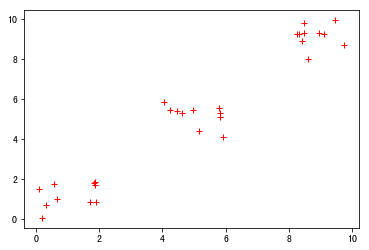

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.mllib.clustering import KMeans

data = 2*np.random.random((30, 2))
data[10:20,:] = data[10:20,:]+4
data[20:,:] = data[20:,:]+8

plt.plot( data[:,0], data[:,1], 'r+' )
plt.show()

rddData = sc.parallelize( data )
model = KMeans.train( rddData, 3, maxIterations=100, initializationMode="kmeans||",
                    seed=50, initializationSteps=5, epsilon=1e-4)